In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [5]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [6]:
import seaborn as sns

np.float64(0.04936908937689042)

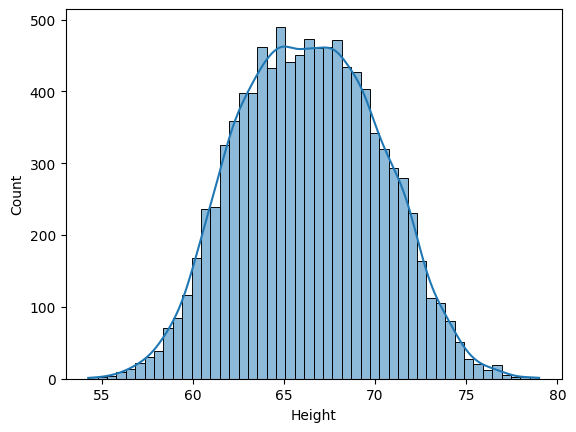

In [12]:
sns.histplot(df['Height'],kde = True)
df.Height.skew()  # dist is not exactly normal but equal to zero (we may use z score here)

<Axes: xlabel='Height'>

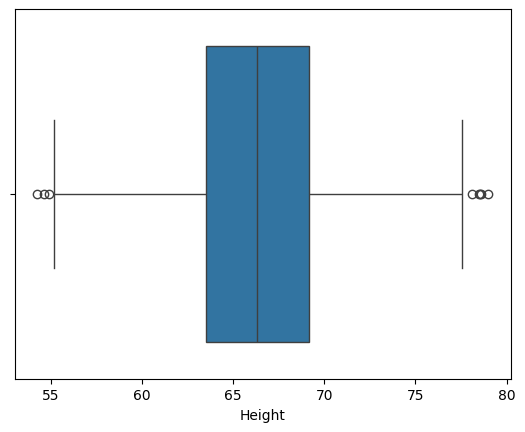

In [13]:
sns.boxplot(x=df['Height'])

In [14]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

np.float64(74.7857900583366)

In [15]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

np.float64(58.13441158671655)

In [16]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [17]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

In [18]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

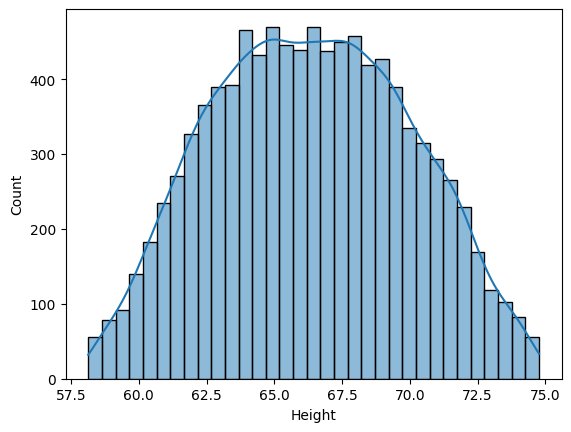

In [20]:
sns.histplot(new_df['Height'],kde= True)

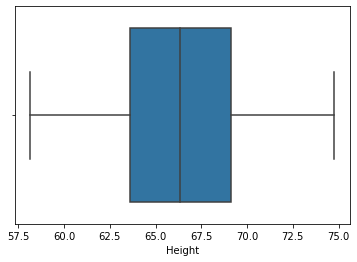

In [21]:
sns.boxplot(new_df['Height'])

In [24]:
# Capping --> Winsorization
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [26]:
df.shape

(10000, 3)

In [27]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

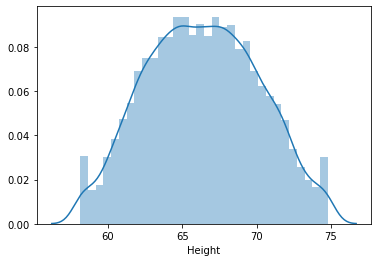

In [28]:
sns.distplot(df['Height'])

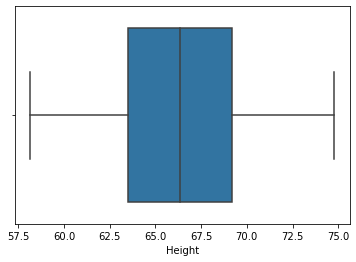

In [29]:
sns.boxplot(df['Height'])